In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=5fdb6f7b4293b6573293fae38d681456c35dd5d4d4c2ba9f8e3452175946b0a1
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
grease = ctrl.Antecedent(np.arange(0, 100, 1), 'grease')
dirt = ctrl.Antecedent(np.arange(0, 100, 1), 'dirt')


In [ ]:
time = ctrl.Consequent(np.arange(0, 100, 1), 'washing time')

In [ ]:
grease['small'] = fuzz.trimf(grease.universe, [0, 0, 50])
grease['average'] = fuzz.trimf(grease.universe, [0, 50, 100])
grease['big'] = fuzz.trimf(grease.universe, [50, 100, 100])

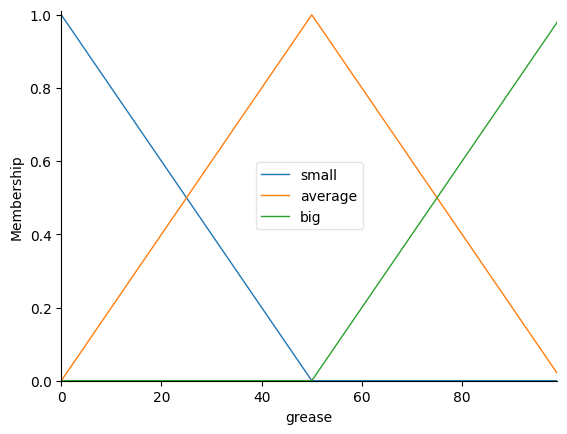

In [ ]:
grease.view()

In [ ]:
dirt['small'] = fuzz.trimf(dirt.universe, [0, 0, 50])
dirt['average'] = fuzz.trimf(dirt.universe, [0, 50, 100])
dirt['big'] = fuzz.trimf(dirt.universe, [50, 100, 100])

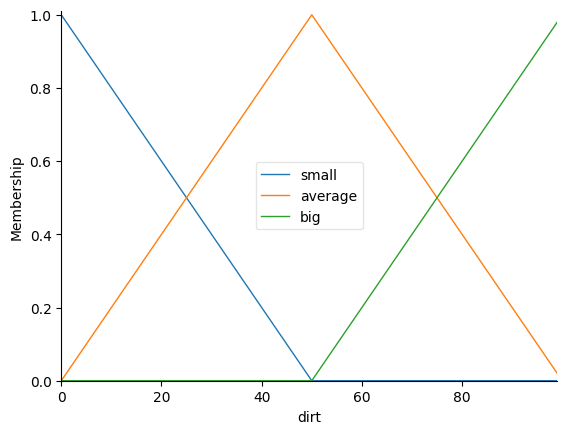

In [ ]:
dirt.view()


In [ ]:
time['Too Short'] = fuzz.trimf(time.universe, [0, 0, 25])
time['Short'] = fuzz.trimf(time.universe, [0, 25, 50])
time['Medium'] = fuzz.trimf(time.universe, [25, 50, 75])
time['Long'] = fuzz.trimf(time.universe, [50, 75, 100])
time['Too Long'] = fuzz.trimf(time.universe, [75, 100, 100])


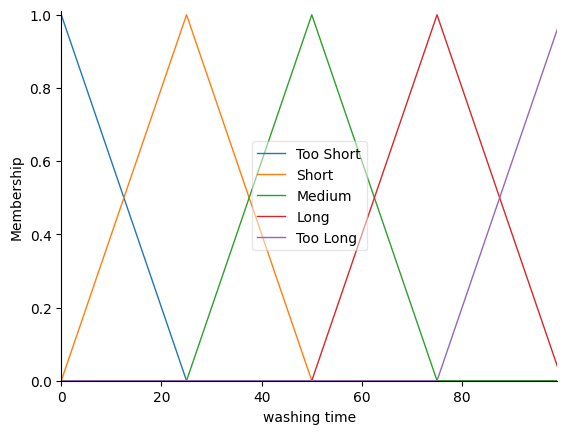

In [ ]:

time.view()


In [ ]:
rule1 = ctrl.Rule(dirt['small'] & grease['small'], time['Too Short'])
rule2 = ctrl.Rule(dirt['average'] & grease['small'], time['Short'])
rule3 = ctrl.Rule(dirt['big'] & grease['small'], time['Medium'])
rule4 = ctrl.Rule(dirt['small'] & grease['average'], time['Short'])
rule5 = ctrl.Rule(dirt['average'] & grease['average'], time['Medium'])
rule6 = ctrl.Rule(dirt['big'] & grease['average'], time['Long'])
rule7 = ctrl.Rule(dirt['small'] & grease['big'], time['Medium'])
rule8 = ctrl.Rule(dirt['average'] & grease['big'], time['Long'])
rule9 = ctrl.Rule(dirt['big'] & grease['big'], time['Too Long'])

In [ ]:
rules = ctrl.ControlSystem([rule1, rule2, rule3,
                            rule4, rule5, rule6,
                            rule7, rule8, rule9])
FLC = ctrl.ControlSystemSimulation(rules)


WASHING TIME = 33.535353535353565



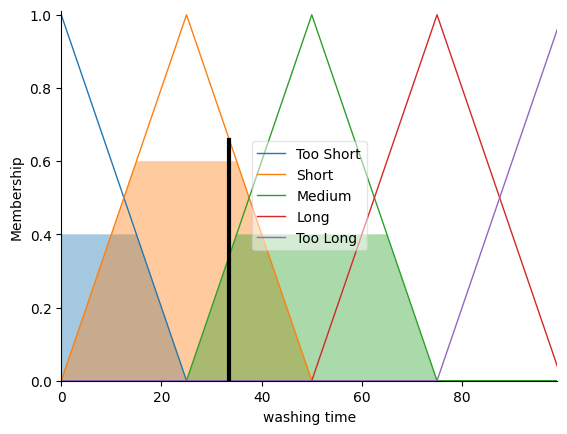

In [ ]:
FLC.input['dirt'] = 20
FLC.input['grease'] = 30
FLC.compute()
print(f"\nWASHING TIME = {FLC.output['washing time']}\n")
time.view(sim = FLC)



WASHING TIME = 49.97096331175199



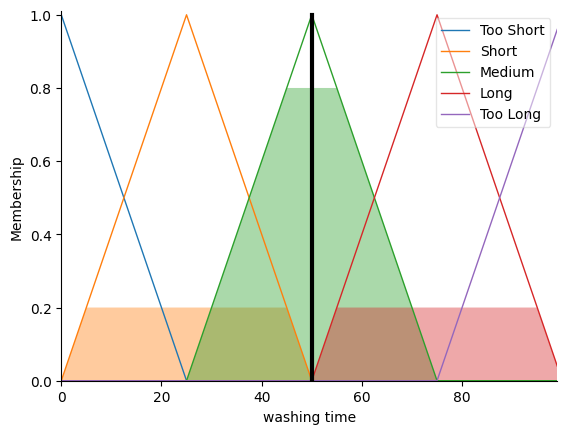

In [ ]:
FLC.input['dirt'] = 40
FLC.input['grease'] = 60
FLC.compute()
print(f"\nWASHING TIME = {FLC.output['washing time']}\n")
time.view(sim = FLC)



WASHING TIME = 70.99598393574293



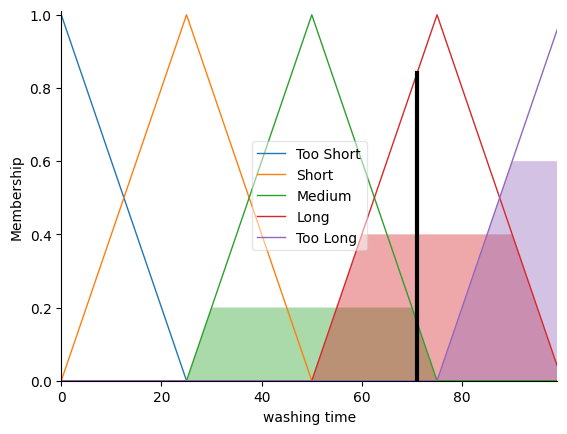

In [ ]:
FLC.input['dirt'] = 80
FLC.input['grease'] = 90
FLC.compute()
print(f"\nWASHING TIME = {FLC.output['washing time']}\n")
time.view(sim = FLC)
